<a href="https://colab.research.google.com/github/CarlosVillavicencio1995/MelanomaData/blob/main/Melanoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar Archivos del Dataset 


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Entrenamiento.zip to Entrenamiento.zip


Se descomprime el zipfile

In [3]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Entrenamiento.zip']),'r')
data.extractall()

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_melanoma = '/content/Entrenamiento/Melanoma'
melanoma_training = []
img_size = 150 

for img in os.listdir(ruta_melanoma):
    img = cv2.imread(os.path.join(ruta_melanoma,img))
    #img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize = cv2.resize(img,(img_size,img_size))
    melanoma_training.append([img_resize])

print(len(melanoma_training))
print(melanoma_training)


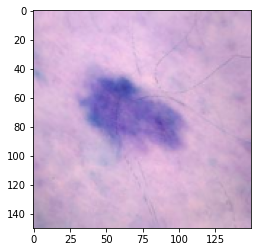

In [5]:
plt.figure()
plt.imshow(np.squeeze(melanoma_training[2]))
#plt.colorbar
#plt.grid(False)
plt.show()

In [ ]:

ruta_Nomelanoma = '/content/Entrenamiento/No Melanoma'
Nomelanoma_training = []
img_size = 150

for img in os.listdir(ruta_Nomelanoma):
    img = cv2.imread(os.path.join(ruta_Nomelanoma,img))
    #img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize = cv2.resize(img,(img_size,img_size))
    Nomelanoma_training.append([img_resize])

print(len(Nomelanoma_training))
print(Nomelanoma_training)

In [7]:
Nomelanoma_training = np.array(Nomelanoma_training)
print(Nomelanoma_training.shape) 

(100, 1, 150, 150, 3)


(1, 150, 150, 3)


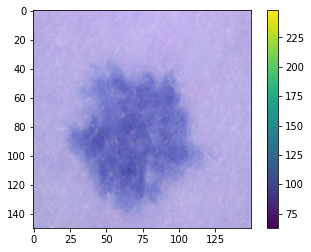

In [8]:
print(Nomelanoma_training[3].shape)
plt.figure()
plt.imshow(np.squeeze(Nomelanoma_training[3]))
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
images = np.concatenate([melanoma_training,Nomelanoma_training])
print(len(images))
Images = np.array(images) 
print(Images.shape)

210
(210, 1, 150, 150, 3)


In [10]:
etiquetas_melanoma = np.repeat(0,105)
print(len(etiquetas_melanoma))
print(etiquetas_melanoma)

105
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
etiquetas_Nomelanoma = np.repeat(1,105)
print(len(etiquetas_melanoma))
print(etiquetas_Nomelanoma)

105
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
class_names = ['Melanoma','Nomelanoma']

In [15]:
labels = np.concatenate([etiquetas_melanoma,etiquetas_Nomelanoma])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)


210
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(210,)


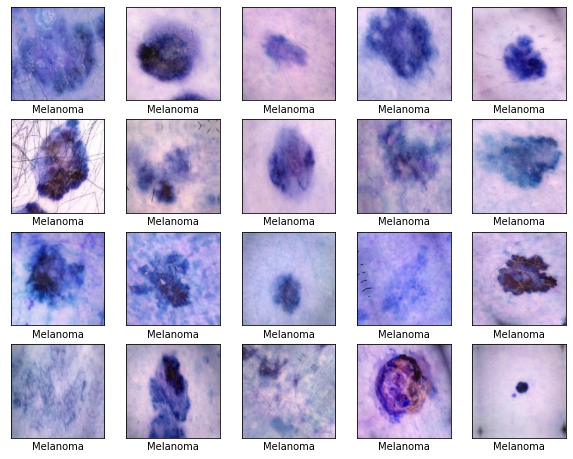

In [16]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(Images[i]))
    plt.xlabel(class_names[Labels[i]])
plt.show()

In [17]:
from re import X
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ''
try:
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

print(tf.__version__)

2.8.0


Entrenamiento

In [28]:
from tensorflow.python.eager.monitoring import Metric
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (1,150,150,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),

    
])
model.compile (optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
model.fit(Images, Labels, epochs = 30)
trained = model.fit(Images, Labels, epochs=30)

Epoch 1/30
7/7 [==============================] - 1s 57ms/step - loss: 15335.0830 - accuracy: 0.4286
Epoch 2/30
7/7 [==============================] - 0s 53ms/step - loss: 4213.9663 - accuracy: 0.4619
Epoch 3/30
7/7 [==============================] - 0s 52ms/step - loss: 1032.4932 - accuracy: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 52ms/step - loss: 259.8792 - accuracy: 0.4810
Epoch 5/30
7/7 [==============================] - 0s 53ms/step - loss: 89.8141 - accuracy: 0.5095
Epoch 6/30
7/7 [==============================] - 0s 55ms/step - loss: 11.1702 - accuracy: 0.4524
Epoch 7/30
7/7 [==============================] - 0s 55ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 55ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/30
7/7 [==============================] - 0s 55ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/30
7/7 [==============================] - 0s 54ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 11/30
7/7

<function matplotlib.pyplot.show>

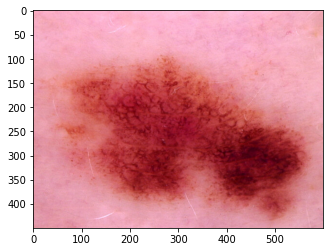

In [49]:
img=cv2.imread("Nomelanoma.jpg")
img_cvt =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show

In [50]:
img = img_cvt
img = cv2.resize(img, (img_size,img_size))
print (img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)


(150, 150, 3)
(1, 150, 150, 3)


In [51]:
predictions_single=model.predict(img)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

[[0.5013523 0.4986477]]
1.0
0
Melanoma
